# Problem Set 1 
Paula Donaldson 

(1) **Method of undetermined coefficients.** We guess and verify that output and inflation are linear functions of the exogenous processes:

$$y_t = \Psi_{ym} \Delta M_t + \Psi_{y \eta} \eta_t$$
$$\pi_t = \Psi_{\pi m} \Delta M_t + \Psi_{\pi \eta} \eta_t$$

These guesses in turn imply:

$$E_t[\pi_{t+1}] = \Psi_{\pi m} \rho \Delta M_t$$
$$E_t[y_{t+1}] = \Psi_{y m} \rho \Delta M_t$$

where I use the fact that $E_t[\eta_{t+1}]=0$.

Next, we plug these expressions in the equilibrium conditions, assuming the economy was in steady state in period $t-1$. After some re-arranging, this implies:

$$0 = [(\beta\rho-1)\Psi_{\pi m} + \kappa \Psi_{ym}] \Delta M_t + [\kappa \Psi_{y \eta} - \kappa -\Psi_{\pi \eta}] \eta_t$$
$$0= [1 - \Psi_{ym}-\Psi_{\pi m}] \Delta M_t + [-\Psi_{\pi \eta} - \Psi_{y \eta}] \eta_t$$

The above equations must hold for any possible realization of the shocks. Therefore, it must be that the four expressions in between brackets are equal to zero. This gives us a system of four equations in four unknowns:$[\Psi_{ym},\Psi_{y\eta},\Psi_{\pi m},\Psi_{\pi \eta}]$

The solution is given by

$$\Psi_{yM} = \frac{1-\beta\rho}{1+\kappa-\beta\rho}$$
$$\Psi_{y\eta} =\frac{\kappa}{1+\kappa}$$
$$\Psi_{\pi M} = \frac{\kappa}{1+\kappa-\beta\rho}$$
$$\Psi_{\pi \eta} = - \frac{\kappa}{1+\kappa}$$

Once we have these values we can get expressions for $\pi_t$ and $y_t$ that only depend on the realization of the exogenous variables plus (potentially) lagged realizations of themselves. 

Step-by-step:

(i) Plug the Phillips curve into the aggregate demand equation and solve for output:

$$y_t = \frac{1}{1+\kappa} \Big[y_{t-1} +\Delta M_t -\beta E_t{\pi_{t+1}} + \kappa  \eta_t \Big]$$

(ii) Plug in the expression for $\Delta M_t$ 

$$y_t = \frac{1}{1+\kappa} \Big[y_{t-1} +\rho \Delta M_{t-1} + \epsilon_t -\beta E_t{\pi_{t+1}} + \kappa  \eta_t \Big]$$

(iii) Use $E_t[\pi_{t+1}] = \Psi_{\pi m} \rho \Delta M_t$ to get rid of the expectational term 

$$y_t = \frac{1}{1+\kappa} \Big[y_{t-1} +\rho \Delta M_{t-1} + \epsilon_t -\beta \rho^2 \Psi_{\pi m} \Delta M_{t-1} - \beta \rho \Psi_{\pi m} \epsilon_t+ \kappa  \eta_t \Big]$$

where I also replaced $\Delta M_t$.

(iv) Grouping terms yields 

$$y_t = \frac{1}{1+\kappa} \Big[y_{t-1} + (\rho-\beta \rho^2 \Psi_{\pi m}) \Delta M_{t-1} + (1- - \beta \rho \Psi_{\pi m}) \epsilon_t + \kappa  \eta_t \Big]$$

From where we get:

$$a = 1/(1+\kappa), \quad b = 1/(1+\kappa) * [\rho -\beta\rho^2 \Psi_{\pi m}], \quad c = 1/(1+\kappa) [1-\beta \Psi_{\pi m}], \quad d = \kappa/(1+\kappa)$$


Lastly, one can replace the expectational term in the Phillips curve too, which yields:

$$y_t = a y_{t-1} + b \Delta M_{t-1} + c \epsilon_t + d \eta_t $$ 
$$\pi_t = f \Delta M_{t} + \kappa (y_t - \eta_t)$$ 
$$ \Delta M_t = \rho \Delta M_{t-1} + \epsilon_r $$ 

where $a,b,c,d,f$ are functions of the structural parameters. Note that I already replaced $y_t^n =\eta_t$. Since we got to express $y_t$ and $\pi_t$ as a function of random processes plus lagged values, we can simulate this economy later on to answer point (3). 

(2) The theoretical impulse response satisfies 

$$E_t[y_{t+h}| \epsilon_t=1] = a E_t[y_{t+h-1}| \epsilon_t=1] + b \rho^{h-1}$$ 

with $E_t[y_t|\epsilon_t=1] = c $.

The code below computes the theorical impulse response evaluated at the values found in point 1.


a: 0.8849557522123894
b: 0.4923076923076922
c: 0.6153846153846153
d: 0.11504424778761063


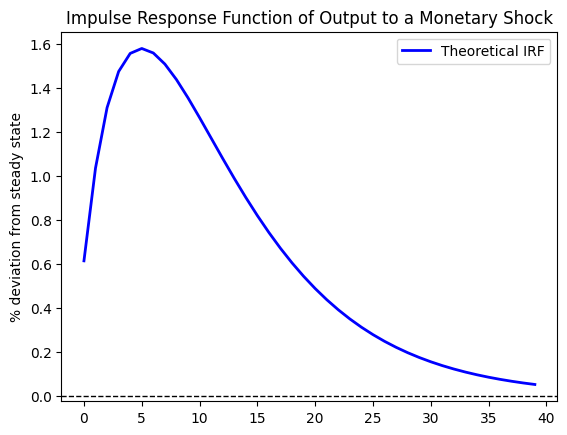

In [22]:
# Import packages 

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import statsmodels.api as sm

# Values for structural parameters 
beta, kappa, rho = .99, .13, .8 
# Standard deviation of exogenous processes 
sigma_e, sigma_eta = .00066, .007 

# Use the expression for \Psi_{yM} from above 
Psi_ym  = (1- beta * rho) / (kappa + 1 - beta * rho)
Psi_piM = kappa/ (kappa + 1 - beta * rho)
a       = (1/(1+kappa))
b       = (rho/(1+kappa)) - (beta / (1+kappa)) * Psi_piM * rho**2 
c       = 1/(1+kappa) *(1 - beta*Psi_piM * rho )
d       = kappa/(1+kappa) 
f       = beta * rho * Psi_piM

print('a:', a)
print('b:', b)
print('c:', c)
print('d:', d)
# Build a function to compute the theoretical IRF at different horizons 
def theoretical_irf(a,b,c ,rho, H=10):
    irf = np.zeros(H)
    # Initialize the first element of the IRF
    irf[0] = c  
    for h in range(1,H):
        irf[h] = a*irf[h-1] + b * rho**(h-1)
    return irf

# Compute IRF and plot it for the first H=10 periods 
theory_irf = theoretical_irf(a,b,c, rho, 40)

plt.plot(theory_irf, linewidth=2, color='b',label='Theoretical IRF')
plt.legend()
plt.title('Impulse Response Function of Output to a Monetary Shock')
plt.ylabel('% deviation from steady state')
plt.axhline(0, color='black', lw=1, ls='--')
plt.show()

## 3) Simulation and estimation of alternative empirical specificaitions 

### First we create a function to simulate one draw/history of this economy. To do this we use the system: 

$$y_t = a y_{t-1} + b \Delta M_{t-1} + c \epsilon_t + d \eta_t $$ 
$$\pi_t = f \Delta M_{t-1} + g \epsilon_t + \kappa (y_t - \eta_t)$$ 
$$ \Delta M_t = \rho \Delta M_{t-1} + \epsilon_r $$ 



In [23]:
# Function to simulate the economy
def simulate_economy(a, b, c, d, f, kappa, rho, sigma_e, sigma_eta, T=500, burn_in=100, seed=None):
    if seed is not None:
        np.random.seed(seed)
    
    # We simulate T+burn_in periods, and discard the first burn_in periods 
    TT= T+ burn_in

    # Generate shocks
    epsilon = np.random.normal(0, sigma_e, TT)
    eta     = np.random.normal(0, sigma_eta, TT)

    # Initialize series at steady-state
    y       = np.zeros(TT)
    pi      = np.zeros(TT)
    delta_M = np.zeros(TT)

    # Use the system we derived in (1) to simulate the path of the economy conditional on the history of shocks
    for t in range(1, TT):
        delta_M[t]  = rho * delta_M[t-1] + epsilon[t]
        y[t]        = a * y[t-1] + b * delta_M[t-1] + c * epsilon[t] + d * eta[t]
        pi[t]       = f * delta_M[t] + kappa * (y[t] - eta[t])

    # Discard the burn-in period
    return pd.DataFrame({'y': y[burn_in:], 'pi': pi[burn_in:], 'delta_M': delta_M[burn_in:], 'epsilon': epsilon[burn_in:], 'eta': eta[burn_in:]})

### Next, we will create three functions to run the different models:

* Models with the contemporaneous realization of the shock plus $p$ lagged values of output
* Model with lagged output plus contemporaneous and $j$ lagged realizations of the shock 
* Jorda projections (w/wo lagged realization of output)

In [24]:

# Function to run regressions and compute IRFs
def ols_irf(simulated_data, lags=1, horizon=10):
    df = simulated_data[['y', 'epsilon']].copy()
    
    # Lagging the data
    for lag in range(1, lags + 1):
        df[f'y_lag{lag}'] = df['y'].shift(lag)

    df = df.dropna()
    X = df[['epsilon'] + [f'y_lag{lag}' for lag in range(1, lags + 1)]]
    X = sm.add_constant(X)
    y = df['y']

    # OLS estimation
    model = sm.OLS(y, X).fit()

    # Compute IRFs

    # The impact response at horizon 0 is just the coefficient on epsilon
    irfs = [model.params['epsilon']]

    # For horizons 1 to H, we use the lagged values of y to evaluate the propagation of the shock
    # Idea: assume epsilon shocks happen only at time 0, and then let the AR dynamics propagate their effects forward.
    #lagged_terms = past values of the response.
    #coeffs = autoregressive coefficients from the OLS.
    # The response at horizon h is just the weighted sum of past responses (using the AR coefficients).
    for h in range(1, horizon):
        lagged_terms = np.array(irfs[-lags:][::-1])
        coeffs = [model.params[f'y_lag{i+1}'] for i in range(lags)]
        response = np.dot(coeffs, lagged_terms) if h >= lags else irfs[-1] * coeffs[0]
        irfs.append(response)

    return np.array(irfs)



def ols_controls(simulated_data, lagsy=1, lags_e=6, H=10):
    """
    Estimate impulse response function (IRF) from an OLS regression with controls using simulated data.

    Parameters
    ----------
    simulated_data : pd.DataFrame
        Must contain columns 'y' (the dependent variable) and 'epsilon' (the structural shock).
    lagsy : int, default=1
        Number of lags of the dependent variable 'y' to include as controls.
    lags_e : int, default=6
        Number of lags of the structural shock 'epsilon' to include as controls (including the contemporaneous shock).
    H : int, default=10
        Maximum horizon at which to compute the impulse response function.

    Returns
    -------
    irf : np.ndarray
        Array of length H+1 containing the impulse response of 'y' to a one-unit shock in 'epsilon' at horizon h=0,
        propagating through autoregressive dynamics and lagged shock effects.

    Notes
    -----
    The method estimates the following regression:
        y_t = α y_{t-1} + ∑_{j=0}^{lags_e} β_j ε_{t-j} + error_t

    It then computes the IRF recursively:
        IRF_0 = β_0
        IRF_h = α * IRF_{h-1} + β_h   for h = 1,...,H

    For h > lags_e, β_h is assumed to be zero.
    """
    df = simulated_data[['y', 'epsilon']].copy()

    # Add lagged variables
    for lag in range(1, lagsy + 1):
        df[f'y_lag{lag}'] = df['y'].shift(lag)
    for lag in range(0, lags_e + 1): 
        df[f'eps_lag{lag}'] = df['epsilon'].shift(lag)

    # Define regressors and outcome
    X_vars = [f'y_lag{lag}' for lag in range(1, lagsy + 1)] + [f'eps_lag{j}' for j in range(0, lags_e + 1)]
    X = df[X_vars]
    X = sm.add_constant(X)
    Y = df['y']

    # Drop missing values from lags
    combined = pd.concat([Y, X], axis=1).dropna()
    Y = combined['y']
    X = combined[X.columns]  # keep correct order

    # Estimate OLS
    model = sm.OLS(Y, X).fit()

    # Extract estimated coefficients
    alpha = model.params.get('y_lag1', 0)  # fallback to 0 if not included
    beta_coefs = [model.params.get(f'eps_lag{j}', 0) for j in range(0, lags_e + 1)]

    # Compute IRFs recursively
    irf = np.zeros(H + 1)
    irf[0] = beta_coefs[0]  # immediate impact

    for h in range(1, H + 1):
        ar_term = alpha * irf[h - 1]
        shock_effect = beta_coefs[h] if h <= lags_e else 0
        irf[h] = ar_term + shock_effect

    return irf


def jorda(simulated_data, lagsy=1, H=10):

    df = simulated_data[['y', 'epsilon']].copy()
    
    # Lagging the data
    for lag in range(1, lagsy + 1):
        df[f'y_lag{lag}'] = df['y'].shift(lag)    
    for hor in range(0, H+1):
        df[f'y_f{hor}'] = df['y'].shift(-hor) 
    
    df  = df.dropna()
    X   = df[['epsilon','y_lag1']]
    X   = sm.add_constant(X)
    irf = np.zeros(H+1) 
    for hh in range(H+1):
        model   = sm.OLS(df[f'y_f{hh}'],X).fit()
        irf[hh] = model.params['epsilon']

    return irf



### Next, we build a function that

* Simulates the economy, runs all regressions and computes IRFs 
* For each repetition $r/R$, we store our estimated IRFs 
* Once we are done we compute the median IRF for each method 
* Plot results against the theoretical IRF (using the function we built before)

In [25]:
# Main simulation and IRF estimation routine
def main_simulation_routine(params, repetitions=100, T=500, horizon=10, seed=None):

    # Put all parameters in a tuple
    a, b, c, d, f, kappa, rho, sigma_e, sigma_eta = params
    # Compute the theoretical IRF
    theoretical = theoretical_irf(a,b,c,rho, H=horizon)

    # Create empty lists to store IRFs
    irfs_1lag, irfs_4lags, irfs_12lags  = [], [], []
    irfs_6eps                           = []
    irfs_jorda                          = []

    for r in range(repetitions):

        # Simulate the economy
        sim_data = simulate_economy(a, b, c, d, f, kappa, rho, sigma_e, sigma_eta, T=T, seed=seed)

        # Compute IRFs using different methods
        irf_1       = ols_irf(sim_data, lags=1, horizon=horizon)
        irf_4       = ols_irf(sim_data, lags=4, horizon=horizon)
        irf_12      = ols_irf(sim_data, lags=12, horizon=horizon)
        irf_6e      = ols_controls(sim_data, 1, 6, horizon)
        irf_jorda   = jorda(sim_data, 1, horizon)

        # Append the IRFs to the lists that contain results from previous repetitions
        irfs_1lag.append(irf_1)
        irfs_4lags.append(irf_4)
        irfs_12lags.append(irf_12)
        irfs_6eps.append(irf_6e)
        irfs_jorda.append(irf_jorda)

    # For each model, compute the median IRF across repetitions    
    irfs_1lag   = np.median(irfs_1lag, axis=0)
    irfs_4lags  = np.median(irfs_4lags, axis=0)
    irfs_12lags = np.median(irfs_12lags, axis=0)
    irfs_6eps   = np.median(irfs_6eps, axis=0)
    irfs_jorda  = np.median(irfs_jorda, axis=0)

    # Plot the results
    plt.figure(figsize=(10,6))
    plt.plot(theoretical, marker='o', label='Theoretical IRF')
    plt.plot(irfs_1lag, marker='x', linestyle='--', label='Estimated IRF (1 lag)')
    plt.plot(irfs_4lags, marker='s', linestyle='-.', label='Estimated IRF (4 lags)')
    plt.plot(irfs_12lags, marker='s', linestyle='-.', label='Estimated IRF (12 lags)')
    plt.plot(irfs_6eps, marker='d', linestyle='-.', label='Estimated IRF - Lagged shocks')
    plt.plot(irfs_jorda, marker='d', linestyle='-.', label='Estimated IRF - Local Projection')

    plt.xlabel('Horizon')
    plt.ylabel('% deviation from steady state')
    plt.title('Impulse Response Functions')
    plt.legend()
    plt.grid(True)
    plt.show()

### Run simulation using the parameter values defined above 



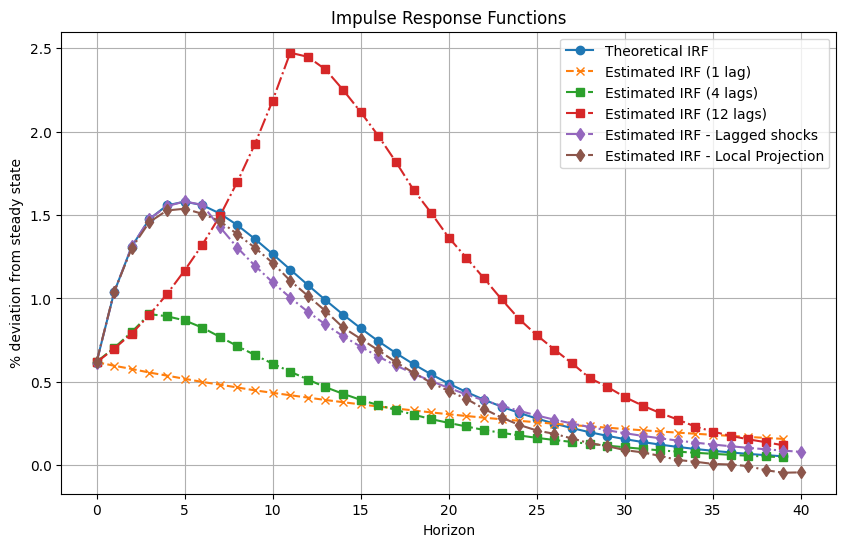

In [26]:
# Use the parameters defined above
params= (a,b,c,d,f, kappa, rho,sigma_e, sigma_eta)

main_simulation_routine(params, repetitions=500, T=500, horizon=40)